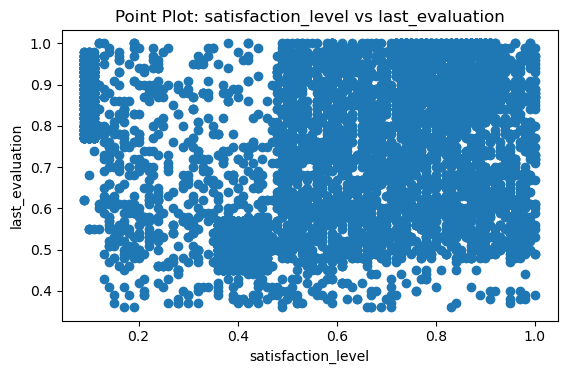

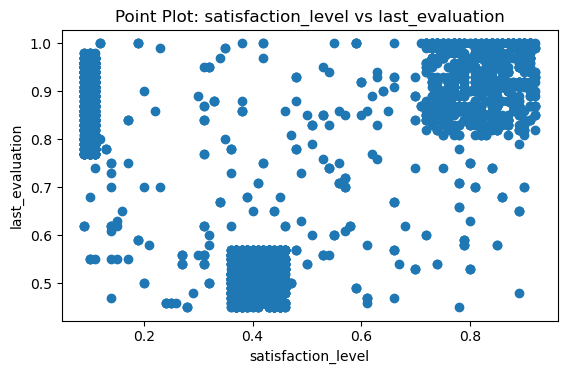

In [1]:
import tkinter as tk
from tkinter import filedialog, ttk, messagebox
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class PointPlotApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Point Plot with Tkinter")
        
        # Frame for file selection and column selection
        self.frame = tk.Frame(self.root)
        self.frame.pack(padx=10, pady=10)
        
        # File selection
        self.file_label = tk.Label(self.frame, text="Select CSV File:")
        self.file_label.grid(row=0, column=0, padx=5, pady=5)
        self.file_button = tk.Button(self.frame, text="Browse", command=self.load_file)
        self.file_button.grid(row=0, column=1, padx=5, pady=5)
        
        # X-axis column selection
        self.x_label = tk.Label(self.frame, text="Select X-axis:")
        self.x_label.grid(row=1, column=0, padx=5, pady=5)
        self.x_combo = ttk.Combobox(self.frame)
        self.x_combo.grid(row=1, column=1, padx=5, pady=5)
        
        # Y-axis column selection
        self.y_label = tk.Label(self.frame, text="Select Y-axis:")
        self.y_label.grid(row=2, column=0, padx=5, pady=5)
        self.y_combo = ttk.Combobox(self.frame)
        self.y_combo.grid(row=2, column=1, padx=5, pady=5)

        # Filter column selection
        self.filter_label = tk.Label(self.frame, text="Select Filter Column:")
        self.filter_label.grid(row=3, column=0, padx=5, pady=5)
        self.filter_combo = ttk.Combobox(self.frame, values=["left", "Work_accident"])
        self.filter_combo.grid(row=3, column=1, padx=5, pady=5)

        # Filter value selection
        self.filter_value_label = tk.Label(self.frame, text="Filter Rows by Value:")
        self.filter_value_label.grid(row=4, column=0, padx=5, pady=5)
        self.filter_value_combo = ttk.Combobox(self.frame, values=["All", "0", "1"])
        self.filter_value_combo.grid(row=4, column=1, padx=5, pady=5)
        self.filter_value_combo.set("All")  # Default value

        # Plot button
        self.plot_button = tk.Button(self.frame, text="Plot", command=self.plot_chart)
        self.plot_button.grid(row=5, column=0, columnspan=2, pady=10)
        
        # Exit button
        self.exit_button = tk.Button(self.frame, text="Exit", command=self.root.quit)
        self.exit_button.grid(row=6, column=0, columnspan=2, pady=10)
        
        # Placeholder for CSV data and canvas
        self.df = None
        self.canvas = None
    
    def load_file(self):
        # Allow user to select a CSV file
        file_path = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv")])
        if file_path:
            try:
                self.df = pd.read_csv(file_path)
                columns = self.df.columns.tolist()
                
                # Update the combo boxes with your column names
                self.x_combo['values'] = ['satisfaction_level','last_evaluation',
                                         'average_montly_hours','number_project']
                self.y_combo['values'] = ['satisfaction_level','last_evaluation',
                                         'average_montly_hours','number_project']
                self.filter_combo['values'] = ["left", "Work_accident","promotion_last_5years"]
            except Exception as e:
                messagebox.showerror("Error", f"Failed to read file: {e}")
    
    def plot_chart(self):
        if self.df is None:
            messagebox.showwarning("Warning", "No file loaded")
            return
        
        x_column = self.x_combo.get()
        y_column = self.y_combo.get()
        filter_column = self.filter_combo.get()
        filter_value = self.filter_value_combo.get()
        
        if not x_column or not y_column:
            messagebox.showwarning("Warning", "Please select columns for both axes")
            return
        
        if filter_value != "All" and filter_column:
            try:
                filter_value = int(filter_value)
                filtered_df = self.df[self.df[filter_column] == filter_value]
            except ValueError:
                messagebox.showwarning("Warning", "Invalid filter value")
                return
        else:
            filtered_df = self.df
        
        if filtered_df.empty:
            messagebox.showwarning("Warning", "No data to plot after applying filter")
            return
        
        try:
            # Clear the previous plot
            if self.canvas:
                self.canvas.get_tk_widget().destroy()
            
            # Plot the point plot
            fig, ax = plt.subplots()
            ax.scatter(filtered_df[x_column], filtered_df[y_column])
            ax.set_xlabel(x_column)
            ax.set_ylabel(y_column)
            ax.set_title(f"Point Plot: {x_column} vs {y_column}")
            
            # Display the plot in a Tkinter window
            self.canvas = FigureCanvasTkAgg(fig, master=self.root)
            self.canvas.draw()
            self.canvas.get_tk_widget().pack()
            
        except Exception as e:
            messagebox.showerror("Error", f"Failed to plot data: {e}")

if __name__ == "__main__":
    root = tk.Tk()
    app = PointPlotApp(root)
    root.mainloop()
